In [15]:
import pandas as pd

In [16]:
#pip install scikit-learn

In [17]:
import pandas as pd
import numpy as np
import transformers
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from transformers import BertTokenizer, BertForSequenceClassification


In [18]:
df = pd.read_csv('/home/vnatireddi1/projects/meld/Text_Analysis/train_sent_emo.csv', encoding='latin1')
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companyÂs t...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustÂve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So letÂs talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


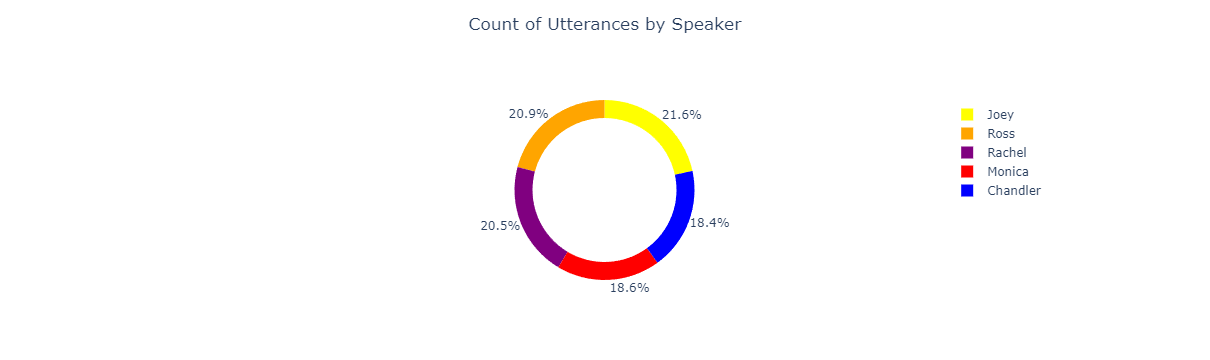

In [83]:
import plotly.express as px
import pandas as pd

# Assuming your data is stored in a pandas dataframe called "df"
# Subset the dataframe to only contain the desired speakers
df_subset = df[df['Speaker'].isin(['Chandler','Monica','Pheobe','Rachel','Ross','Joey'])]

# Count the number of utterances for each speaker
speaker_counts = df_subset['Speaker'].value_counts()

# Create a donut-type pie chart with different colors for each speaker
fig = px.pie(speaker_counts, values=speaker_counts.values, names=speaker_counts.index, 
             title="Count of Utterances by Speaker", color=speaker_counts.index, 
             color_discrete_map={'Chandler': 'blue', 'Monica': 'red', 'Pheobe': 'green', 
                                 'Rachel': 'purple', 'Ross': 'orange', 'Joey': 'yellow'},
             hole=0.8)

# Update the layout to center the title
fig.update_layout(title={
        'text': "Count of Utterances by Speaker",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

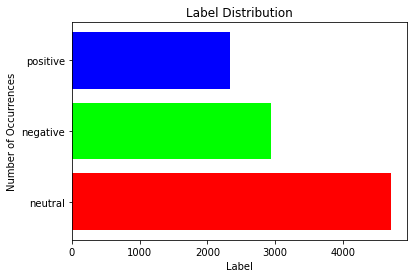

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('/home/vnatireddi1/projects/meld/Text_Analysis/train_sent_emo.csv')

# Count the number of occurrences of each label in the column
label_counts = data['Sentiment'].value_counts()

# Define custom colors for each label
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF']

# Create a horizontal bar plot of the label distribution
plt.barh(label_counts.index, label_counts.values, color=colors)

# Add labels and title to the plot
plt.xlabel('Label')
plt.ylabel('Number of Occurrences')
plt.title('Label Distribution')

# Display the plot
plt.show()

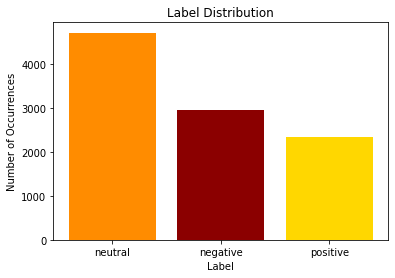

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from a CSV file
data = pd.read_csv('/home/vnatireddi1/projects/meld/Text_Analysis/train_sent_emo.csv')

# Count the number of occurrences of each label in the column
label_counts = data['Sentiment'].value_counts()

# Create a vertical bar chart of the label distribution with custom colors
colors = ['darkorange', 'darkred', 'gold', 'darkslategray', 'mediumvioletred']
plt.bar(label_counts.index, label_counts.values, color=colors)

# Add labels and title to the plot
plt.xlabel('Label')
plt.ylabel('Number of Occurrences')
plt.title('Label Distribution')

# Display the plot
plt.show()


In [49]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 4.7 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


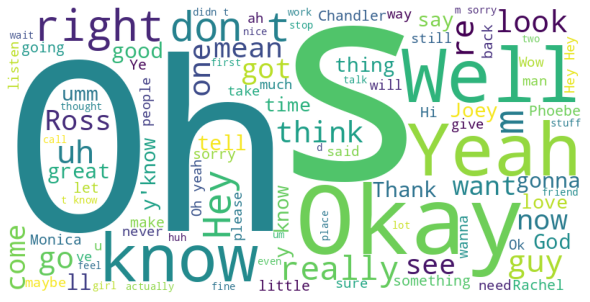

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re

# Load data from a CSV file into a DataFrame
data = pd.read_csv('/home/vnatireddi1/projects/meld/Text_Analysis/train_sent_emo.csv')

# Remove all standalone 'S' from the 'Utterance' column
data['Utterance'] = data['Utterance'].apply(lambda x: re.sub(r'\bS\b', '', x))

# Get the text from the modified 'Utterance' column
text = ' '.join(data['Utterance'].values.tolist())

# Create a word cloud object with custom parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<ipython-input-100-e7a66386b759>:9: FutureWarning:

The default value of regex will change from True to False in a future version.



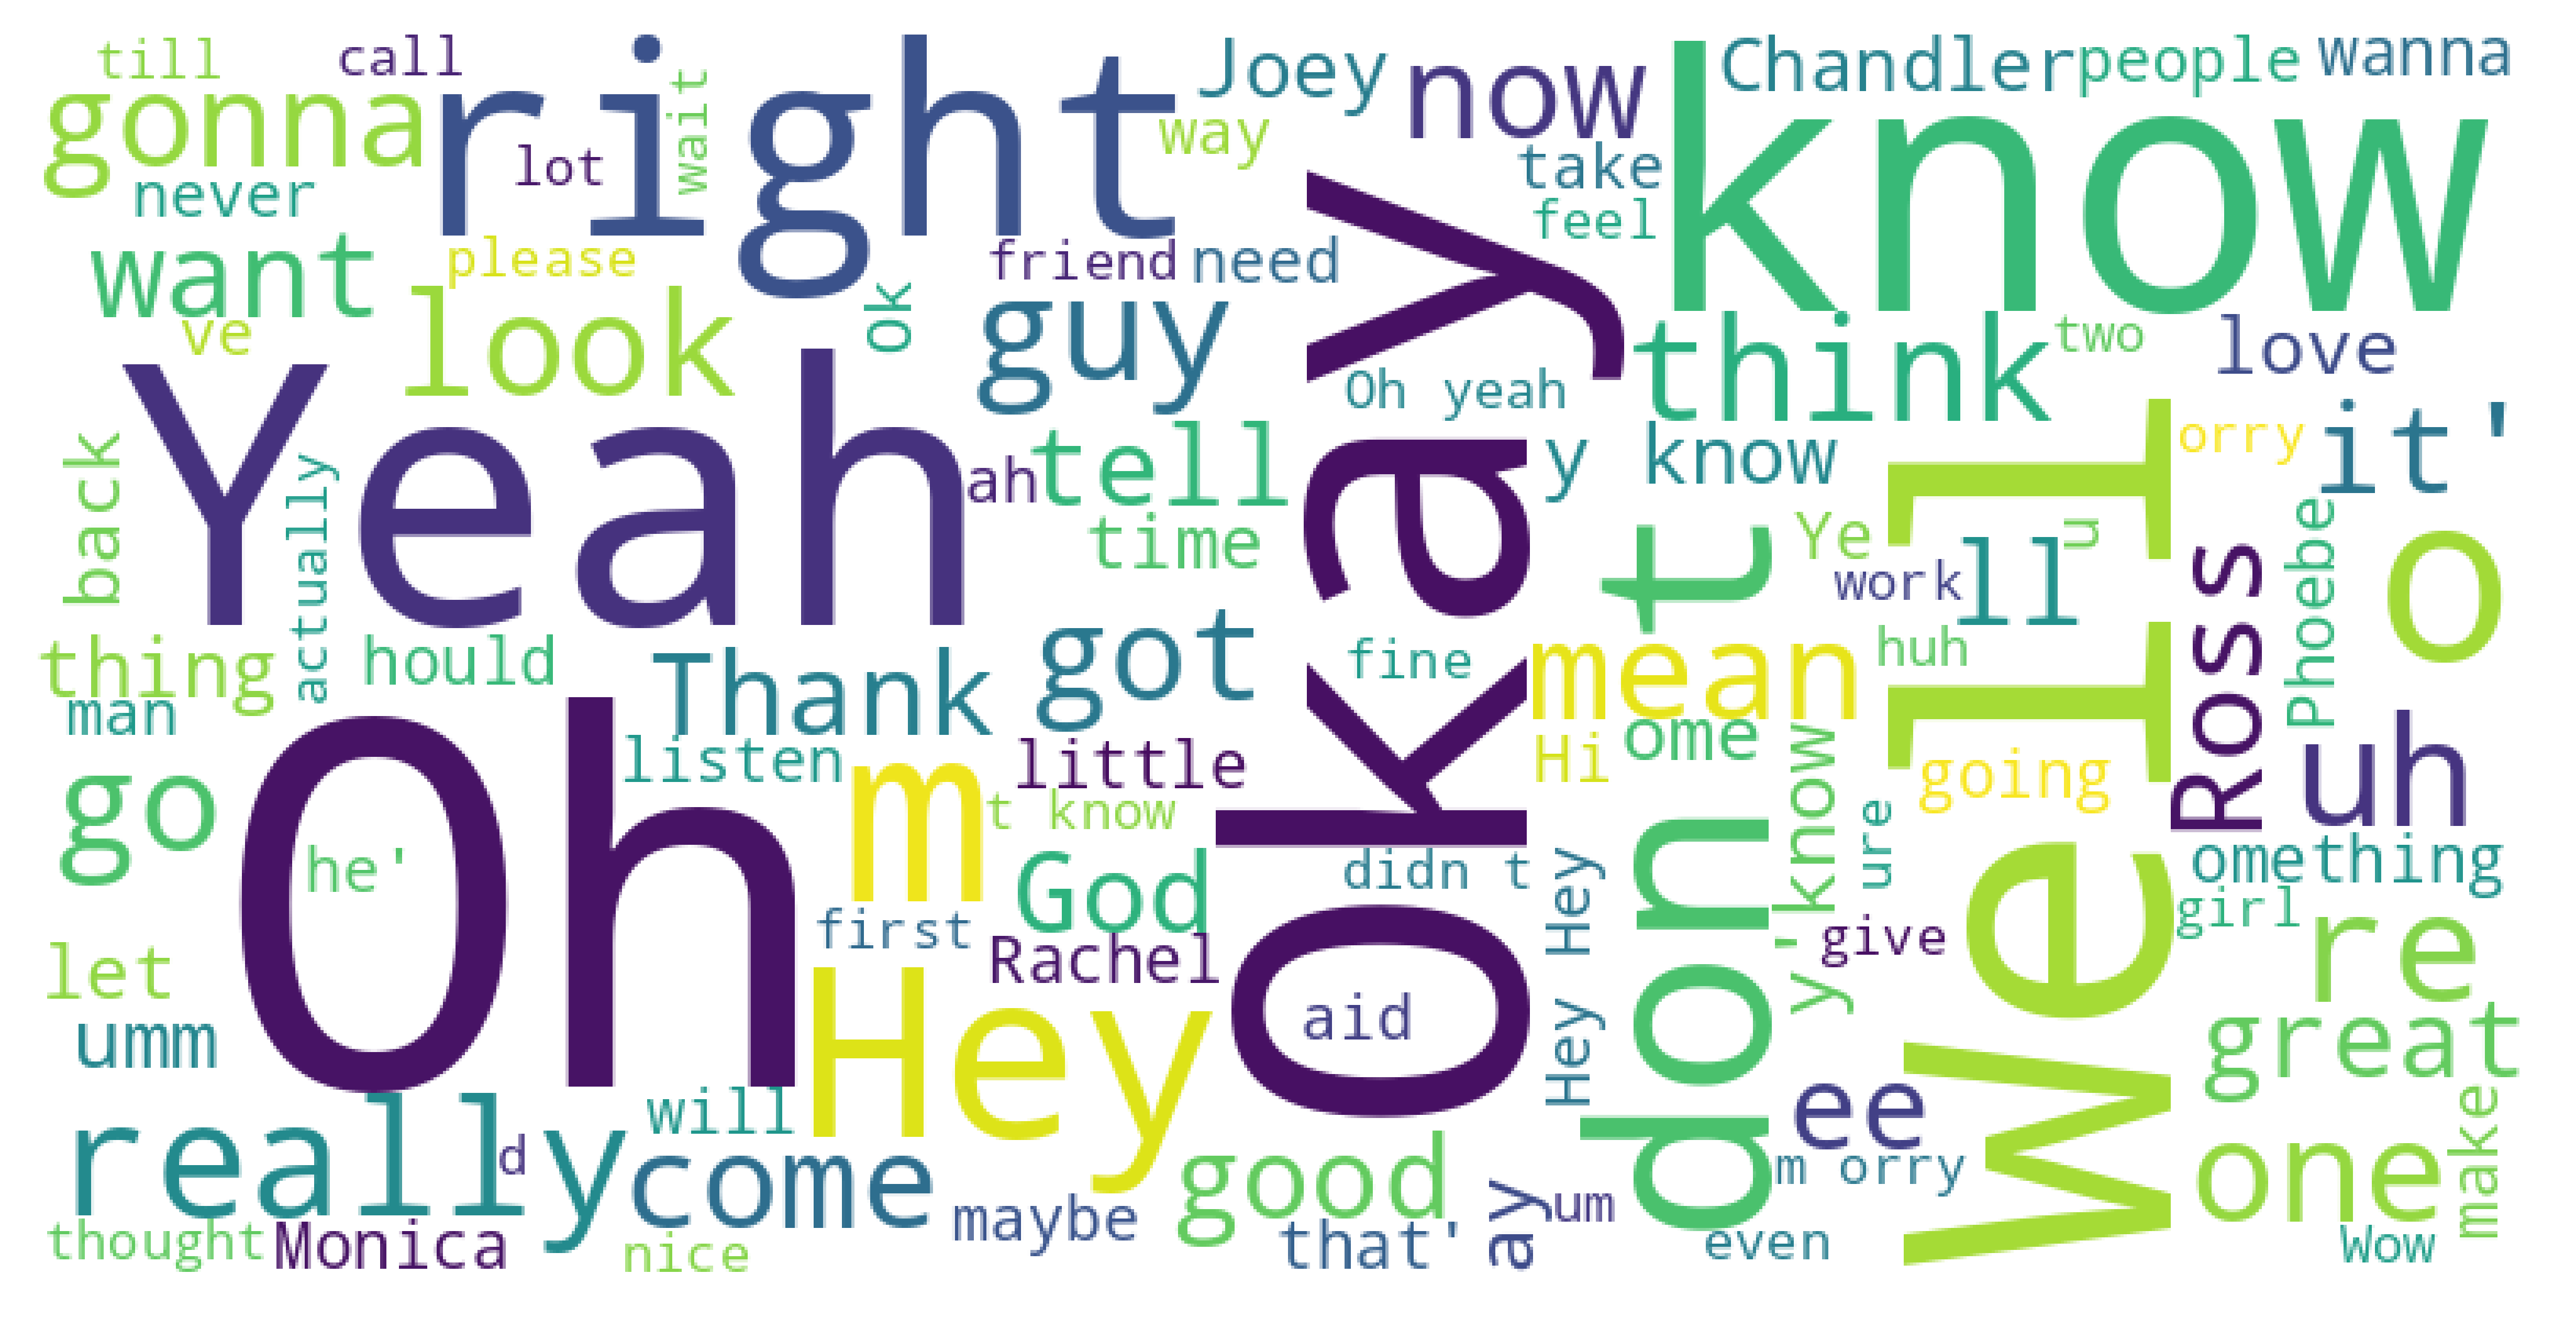

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load data from a CSV file into a DataFrame
data = pd.read_csv('/home/vnatireddi1/projects/meld/Text_Analysis/train_sent_emo.csv')

# Remove all standalone 'S' from the 'Utterance' column
data['Utterance'] = data['Utterance'].str.replace(r'\bs', '')

# Get the text from the modified 'Utterance' column
text = ' '.join(data['Utterance'].values.tolist())

# Create a word cloud object with custom parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(8,10), facecolor=None, dpi=600)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

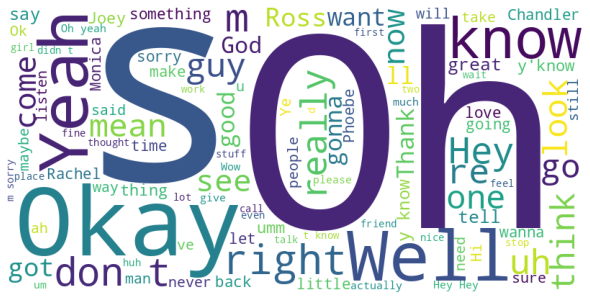

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load data from a CSV file into a DataFrame
data = pd.read_csv('/home/vnatireddi1/projects/meld/Text_Analysis/train_sent_emo.csv')

#
# Get the text from the column of interest, removing any occurrence of the letter 'S'
text = ' '.join(data['Utterance'].str.replace('', '').values.tolist())

# Create a word cloud object with custom parameters
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(text)

# Display the generated image
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

#
# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 3. Clean the text data by removing special characters, URLs, mentions, and stopwords using regular expressions and the NLTK library:

In [30]:
import re
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vnatireddi1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text) # remove URLs
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'[^\w\s]', '', text) # remove special characters
    text = text.lower() # convert to lowercase
    stop_words = set(stopwords.words('english')) #remove stopwords
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    text = ' '.join(filtered_tokens)
    return text

df['clean_text'] = df['Utterance'].apply(lambda x: clean_text(x))


In [32]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,clean_text
0,1,also I was the point person on my companyÂs t...,Chandler,neutral,1,0,0,8,21,"00:16:16,059","00:16:21,731",also point person companyâs transition kl5 gr6...
1,2,You mustÂve had your hands full.,The Interviewer,neutral,1,0,1,8,21,"00:16:21,940","00:16:23,442",mustâve hands full
2,3,That I did. That I did.,Chandler,neutral,1,0,2,8,21,"00:16:23,442","00:16:26,389",
3,4,So letÂs talk a little bit about your duties.,The Interviewer,neutral,1,0,3,8,21,"00:16:26,820","00:16:29,572",letâs talk little bit duties
4,5,My duties? All right.,Chandler,surprise,2,0,4,8,21,"00:16:34,452","00:16:40,917",duties right


### 4. Encode the target variable using LabelEncoder:


In [33]:
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Emotion'])

### 5. Split the dataset into training and testing sets:


In [34]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Emotion'], test_size=0.2, random_state=42)

### 6. Convert the text data into numerical format using CountVectorizer and TfidfTransformer:


In [35]:
# Apply count vectorization and tf-idf transformation 
# to the training and testing data
cv = CountVectorizer()
X_train_counts = cv.fit_transform(X_train)
tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train_counts)
X_test_counts = cv.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)

In [36]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Train a logistic regression model on the preprocessed data
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

# Evaluate the logistic regression model on the testing data
lr_pred = lr.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, lr_pred)
report = classification_report(y_test, lr_pred, target_names=le.classes_)

print("Accuracy:", accuracy)
print("Classification report:\n", report)


Accuracy: 0.5215215215215215
Classification report:
               precision    recall  f1-score   support

       anger       0.27      0.05      0.09       226
     disgust       0.00      0.00      0.00        55
        fear       0.00      0.00      0.00        44
         joy       0.43      0.23      0.30       332
     neutral       0.55      0.90      0.68       985
     sadness       0.35      0.06      0.11       129
    surprise       0.47      0.25      0.33       227

    accuracy                           0.52      1998
   macro avg       0.29      0.21      0.21      1998
weighted avg       0.45      0.52      0.44      1998



/home/vnatireddi1/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Apply tf-idf vectorization to the training and testing data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a random forest classifier on the preprocessed data
rfc = RandomForestClassifier()
rfc.fit(X_train_tfidf, y_train)

# Evaluate the random forest classifier on the testing data
rfc_pred = rfc.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, rfc_pred)
report = classification_report(y_test, rfc_pred, target_names=le.classes_)

print("Accuracy:", accuracy)
print("Classification report:\n", report)

Accuracy: 0.5115115115115115
Classification report:
               precision    recall  f1-score   support

       anger       0.22      0.08      0.11       226
     disgust       0.46      0.11      0.18        55
        fear       0.09      0.02      0.04        44
         joy       0.43      0.23      0.30       332
     neutral       0.55      0.86      0.67       985
     sadness       0.48      0.12      0.20       129
    surprise       0.41      0.25      0.31       227

    accuracy                           0.51      1998
   macro avg       0.38      0.24      0.26      1998
weighted avg       0.46      0.51      0.45      1998



In [38]:
from sklearn.svm import SVC

# Train a SVM classifier on the preprocessed data
svm = SVC()
svm.fit(X_train_tfidf, y_train)

# Evaluate the SVM classifier on the testing data
svm_pred = svm.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, svm_pred)
report = classification_report(y_test, svm_pred, target_names=le.classes_)

print("Accuracy:", accuracy)
print("Classification report:\n", report)


Accuracy: 0.5255255255255256
Classification report:
               precision    recall  f1-score   support

       anger       0.34      0.04      0.08       226
     disgust       0.57      0.07      0.13        55
        fear       0.00      0.00      0.00        44
         joy       0.48      0.18      0.26       332
     neutral       0.53      0.94      0.68       985
     sadness       0.50      0.06      0.11       129
    surprise       0.60      0.18      0.27       227

    accuracy                           0.53      1998
   macro avg       0.43      0.21      0.22      1998
weighted avg       0.49      0.53      0.43      1998



/home/vnatireddi1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vnatireddi1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vnatireddi1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.naive_bayes import MultinomialNB

# Train a Multinomial Naive Bayes classifier on the preprocessed data
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Evaluate the Multinomial Naive Bayes classifier on the testing data
nb_pred = nb.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, nb_pred)
report = classification_report(y_test, nb_pred, target_names=le.classes_)

print("Accuracy:", accuracy)
print("Classification report:\n", report)


Accuracy: 0.51001001001001
Classification report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00       226
     disgust       0.00      0.00      0.00        55
        fear       0.00      0.00      0.00        44
         joy       0.49      0.08      0.14       332
     neutral       0.51      0.99      0.67       985
     sadness       0.00      0.00      0.00       129
    surprise       0.72      0.09      0.16       227

    accuracy                           0.51      1998
   macro avg       0.25      0.17      0.14      1998
weighted avg       0.41      0.51      0.37      1998



/home/vnatireddi1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vnatireddi1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vnatireddi1/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting Classifier on the preprocessed data
gbc = GradientBoostingClassifier()
gbc.fit(X_train_tfidf, y_train)

# Evaluate the Gradient Boosting Classifier on the testing data
gbc_pred = gbc.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, gbc_pred)
report = classification_report(y_test, gbc_pred, target_names=le.classes_)

print("Accuracy:", accuracy)
print("Classification report:\n", report)


Accuracy: 0.5235235235235235
Classification report:
               precision    recall  f1-score   support

       anger       0.31      0.04      0.08       226
     disgust       0.21      0.09      0.13        55
        fear       0.10      0.07      0.08        44
         joy       0.59      0.18      0.28       332
     neutral       0.54      0.93      0.68       985
     sadness       0.43      0.09      0.15       129
    surprise       0.53      0.19      0.28       227

    accuracy                           0.52      1998
   macro avg       0.39      0.23      0.24      1998
weighted avg       0.49      0.52      0.44      1998



In [68]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load data from a CSV file
data = pd.read_csv('/home/vnatireddi1/projects/meld/Text_Analysis/train_sent_emo.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Utterance'], data['Sentiment'], test_size=0.2, random_state=42)

# Encode the labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Convert the text data into numerical sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure that they have the same length
max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Define the LSTM model architecture
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 32, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 28s 116ms/step - loss: 1.1029 - accuracy: 0.4626 - val_loss: 1.0595 - val_accuracy: 0.4759
Epoch 2/10
200/200 [==============================] - 23s 114ms/step - loss: 1.0643 - accuracy: 0.4601 - val_loss: 1.0567 - val_accuracy: 0.4759
Epoch 3/10
200/200 [==============================] - 23s 113ms/step - loss: 1.0643 - accuracy: 0.4637 - val_loss: 1.0533 - val_accuracy: 0.4759
Epoch 4/10
200/200 [==============================] - 21s 107ms/step - loss: 1.0644 - accuracy: 0.4607 - val_loss: 1.0612 - val_accuracy: 0.4759
Epoch 5/10
200/200 [==============================] - 22s 113ms/step - loss: 1.0651 - accuracy: 0.4637 - val_loss: 1.0586 - val_accuracy: 0.4759
Epoch 6/10
200/200 [==============================] - 23s 115ms/step - loss: 1.0631 - accuracy: 0.4637 - val_loss: 1.0539 - val_accuracy: 0.4759
Epoch 7/10
200/200 [==============================] - 23s 113ms/step - loss: 1.0639 - accuracy: 0.4637 - val_loss: 1.0529 - val_ac

In [67]:
# Evaluate the model on the testing data
accuracy = model.evaluate(X_test_padded, y_test)[1]
predictions = model.predict(X_test_padded)
y_pred = [le.inverse_transform([p.argmax()])[0] for p in predictions]
report = classification_report(y_test, y_pred, target_names=le.classes_)

print("Accuracy:", accuracy)
print("Classification report:\n", report)

63/63 [==============================] - 2s 38ms/step - loss: 1.0440 - accuracy: 0.4930
Accuracy: 0.7615115115115115


In [65]:
#!pip3 install --disable-pip-version-check --no-cache-dir tensorflow


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


In [57]:
# Sample input string to classify
input_string = "Joe does not share food"

# Convert the input string to a tf-idf vector using the trained vectorizer object
input_tfidf = vectorizer.transform([input_string])

# Use the trained logistic regression model to predict the label for the input string
predicted_label = lr.predict(input_tfidf)

# Print the predicted label
print("Predicted label:", predicted_label)


Predicted label: ['neutral']


In [ ]:
# import torch
# import pandas as pd
# from sklearn.metrics import accuracy_score, classification_report
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# # Load the pre-trained BERT tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # Load the training and testing data into Pandas DataFrames
# train_df = pd.read_csv('/home/vnatireddi1/projects/meld/Text_Analysis/train_sent_emo.csv')
# test_df = pd.read_csv('test.csv')

# # Tokenize the training and testing data
# train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True)
# test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True)

# # Convert the labels to numerical values
# train_labels = train_df['label'].tolist()
# test_labels = test_df['label'].tolist()

# # Convert the tokenized data into PyTorch tensors
# train_dataset = torch.utils.data.TensorDataset(
#     torch.tensor(train_encodings['input_ids']),
#     torch.tensor(train_encodings['attention_mask']),
#     torch.tensor(train_labels)
# )
# test_dataset = torch.utils.data.TensorDataset(
#     torch.tensor(test_encodings['input_ids']),
#     torch.tensor(test_encodings['attention_mask']),
#     torch.tensor(test_labels)
# )

# # Define the hyperparameters
# batch_size = 16
# epochs = 4
# learning_rate = 2e-5

# # Load the pre-trained BERT model and add a classification head on top
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# # Create a PyTorch DataLoader object for the training and testing data
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

# # Set the optimizer and scheduler
# optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)
# total_steps = len(train_loader) * epochs
# scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# # Fine-tune the pre-trained BERT model on the training data
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)
# for epoch in range(epochs):
#     model.train()
#     for batch in train_loader:
#         inputs = {
#             'input_ids': batch[0].to(device),
#             'attention_mask': batch[1].to(device),
#             'labels': batch[2].to(device)
#         }
#         optimizer.zero_grad()
#         outputs = model(**inputs)
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()
#         scheduler.step()

# # Evaluate the fine-tuned BERT model on the testing data
# model.eval()
# predictions = []
# with torch.no_grad():
#     for batch in test_loader:
#         inputs = {
#             'input_ids': batch[0].to(device),
#             'attention_mask': batch[1].to(device)
#         }
#         outputs = model(**inputs)
#         logits = outputs.logits
#         preds = torch.argmax(logits, axis=1)
#         predictions.extend(preds.cpu().numpy().tolist())

# # Calculate the accuracy and classification report
# accuracy = accuracy_score(test_labels, predictions)
# report = classification_report(test_labels, predictions)

# print("Accuracy:", accuracy)
# print("Classification report:\n", report)


In [58]:
#!pip install gensim nltk pandas sklearn

import gensim.downloader as api
import nltk
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import re

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /home/vnatireddi1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vnatireddi1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
data = pd.read_csv('/home/vnatireddi1/projects/meld/Text_Analysis/train_sent_emo.csv', encoding='latin1')
data = data[['Utterance', 'Sentiment']]
data.dropna(inplace=True)

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'[^\w\s]', '', text) # remove special characters
    text = text.lower()
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    text = re.sub('\s+', ' ', text)
    text = ' '.join([word for word in text.split() if word not in nltk.corpus.stopwords.words('english')])
    return text

data['Utterance'] = data['Utterance'].apply(preprocess_text)


In [11]:
# Download pretrained word2vec model
wv = api.load('word2vec-google-news-300')

import numpy as np

def create_word_vectors(text):
    vectors = []
    for word in nltk.word_tokenize(text):
        if word in wv:
            vectors.append(wv[word])
    if not vectors:
        vectors.append([0] * 300)
    return np.mean(vectors, axis=0)


data['WordVectors'] = data['Utterance'].apply(create_word_vectors)


In [12]:
import numpy as np

def create_word_vectors(text):
    vectors = []
    for word in nltk.word_tokenize(text.lower()):
        if word in wv:
            vectors.append(wv[word])
    if not vectors:
        vectors.append([0] * 300)
    return np.mean(vectors, axis=0)
data['WordVectors'] = data['Utterance'].apply(create_word_vectors)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['WordVectors'], data['Sentiment'], test_size=0.2, random_state=42)

In [14]:
model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

X_train_list = [str(text) for text in X_train.tolist()]
X_test_list = [str(text) for text in X_test.tolist()]

model.fit(X_train_list, y_train)
y_pred = model.predict(X_test_list)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.498998998998999


### Here's an example code snippet that uses the Word2Vec algorithm from gensim to generate word embeddings for the text data, and then trains a convolutional neural network (CNN) on the resulting embeddings:

In [80]:
# import necessary libraries
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Sentiment'], test_size=0.2, random_state=42)

# tokenize the training data
sentences = [sentence.split() for sentence in X_train]

# train Word2Vec model on the training data
w2v_model = Word2Vec(sentences, size=100, window=5, min_count=1)

# transform the training data into word vectors using the trained Word2Vec model
X_train_vectors = []
for sentence in sentences:
    sentence_vector = []
    for word in sentence:
        if word in w2v_model.wv.vocab:
            sentence_vector.append(w2v_model[word])
    if len(sentence_vector) == 0:
        sentence_vector = [np.zeros(100)] # If all words in a sentence are not in the vocabulary, use a zero vector
    sentence_vector_mean = np.mean(sentence_vector, axis=0) # Average the word vectors in the sentence to get a sentence vector
    X_train_vectors.append(sentence_vector_mean)
X_train_vectors = np.array(X_train_vectors)

# train a Random Forest model on the word vectors
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vectors, y_train)

# tokenize the testing data
test_sentences = [sentence.split() for sentence in X_test]

# transform the testing data into word vectors using the trained Word2Vec model
X_test_vectors = []
for sentence in test_sentences:
    sentence_vector = []
    for word in sentence:
        if word in w2v_model.wv.vocab:
            sentence_vector.append(w2v_model[word])
    if len(sentence_vector) == 0:
        sentence_vector = [np.zeros(100)] # If all words in a sentence are not in the vocabulary, use a zero vector
    sentence_vector_mean = np.mean(sentence_vector, axis=0) # Average the word vectors in the sentence to get a sentence vector
    X_test_vectors.append(sentence_vector_mean)
X_test_vectors = np.array(X_test_vectors)

# evaluate the Random Forest model on the testing data
y_pred = rf_model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


TypeError: __init__() got an unexpected keyword argument 'size'

In [53]:
#!pip install --upgrade gensim


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 9.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 9.5 MB/s eta 0:00:00:00:0100:01


In [ ]:
# Train and evaluate Logistic Regression model
clf1 = LogisticRegression()
clf1.fit(X_train_tfidf, y_train)
y_pred1 = clf1.predict(X_test_tfidf)
accuracy1 = accuracy_score(y_test, y_pred1)
print('Logistic Regression Accuracy:', accuracy1)
print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred1))

# Train and evaluate Naive Bayes model
clf2 = MultinomialNB()
clf2.fit(X_train_vec, y_train)
y_pred2 = clf2.predict(X_test_vec)
accuracy2 = accuracy_score(y_test, y_pred2)
print('Naive Bayes Accuracy:', accuracy2)
print('Naive Bayes Classification Report:')
print(classification_report(y_test, y_pred2))

# Train and evaluate Random Forest model
clf3 = RandomForestClassifier()
clf3.fit(X_train_vec, y_train)
y_pred3 = clf3.predict(X_test_vec)
accuracy3 = accuracy_score(y_test, y_pred3)
print('Random Forest Accuracy:', accuracy3)
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred3))


### 7. Use BERT for sequence classification:


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.train()

# Tokenize the input text and convert to tensor format
def tokenize(text):
    encoded_input = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
    return encoded_input

X_train = tokenize(X_train.tolist())
y_train = torch.tensor(y_train.values)
X_test = tokenize(X_test.tolist())
y_test = torch.tensor(y_test.values)

# Train the BERT model
optimizer = transformers.AdamW(model.parameters(), lr=1e-5)
epochs = 3
for epoch in range(epochs):
    outputs = model(X_train['input_ids'], attention_mask=X_train['attention_mask'], labels=y_train)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

# Evaluate the BERT model on the testing set
model.eval()
with torch.no_grad():
    outputs = model(X_test['input_ids'], attention_mask=X_test['attention_mask'])
   


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

### additional performance metrics such as confusion matrices. 
### Here's an example code snippet that shows how to calculate and plot the confusion matrix for the BERT model:

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for BERT model
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('BERT Confusion Matrix')
plt.show()


NameError: name 'y_test' is not defined

In [1]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Calculate accuracy, precision, recall, and F1-score for BERT model
acc = accuracy_score(y_test, predictions)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')

print('BERT Model Performance:')
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1-score:', f1)


NameError: name 'y_test' is not defined